# Measures of Distribution Shape

## Objectives

- Understand and calculate critical measures of distribution shape, specifically skewness, and kurtosis, using Python.
- Learn to interpret these measures to analyze the symmetry and peakedness of data distributions.
- Develop visualization skills to represent the shape features of various datasets effectively.

## Background

This notebook delves into the measures of distribution shape—skewness and kurtosis—which help describe how data is distributed around the mean. Students will explore these concepts through Python to analyze and visualize the shape and spread of data from real-world datasets, gaining insights into how these distributions affect statistical interpretations and outcomes.

## Datasets Used

The primary dataset used in this section is `student-mat.csv`, which includes comprehensive student performance data from two high schools in Portugal. 

## Introduction

The principal measure of distribution shape used in statistics are skewness and kurtosis. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

## Tha Data

In [2]:
data = pd.read_csv('student-mat.csv', sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,...,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,...,3,6,5,6,6
1,GP,F,17,U,GT3,...,3,4,5,5,6
2,GP,F,15,U,LE3,...,3,10,7,8,10
3,GP,F,15,U,GT3,...,5,2,15,14,15
4,GP,F,16,U,GT3,...,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **school**: student's school (***`binary`***: 'GP' or 'MS')
- **sex**: student's sex (***`binary`***: 'F' - female or 'M' - male)
- **age**: student's age (***`numeric`***: from 15 to 22)
- **studytime**: weekly study time (***`numeric`***: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **schoolsup**: extra educational support (***`binary`***: yes or no)
- **internet**: Internet access at home (***`binary`***: yes or no)
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [3]:
data = data[['school','sex','age','studytime','schoolsup','internet','G1','G2','G3']]
print(data.shape)
data.head()

(395, 9)


,school,sex,age,studytime,schoolsup,internet,G1,G2,G3
0,GP,F,18,2,yes,no,5,6,6
1,GP,F,17,2,no,yes,5,5,6
2,GP,F,15,2,yes,yes,7,8,10
3,GP,F,15,3,no,yes,15,14,15
4,GP,F,16,2,no,no,6,10,10


## Skewness

**Skewness** is a measure of the symmetry of a distribution.

- `skewness = 0`:  normally distributed.
- `skewness > 0`:  more weight in the left tail of the distribution.
- `skewness < 0`:  more weight in the distribution's right tail. 

The formula is: $skewness = 3 * (Mean - Median) / Std$

In [4]:
from scipy.stats import skew

Normal Distribution (0,1)

In [5]:
n01 = np.random.normal(0,1,100000)

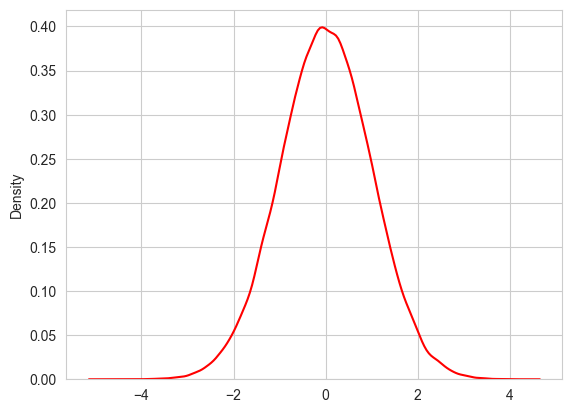

In [6]:
sns.kdeplot(n01, fill=False, color='red');

In [7]:
s = str(round(skew(n01),4))
s

'-0.0109'

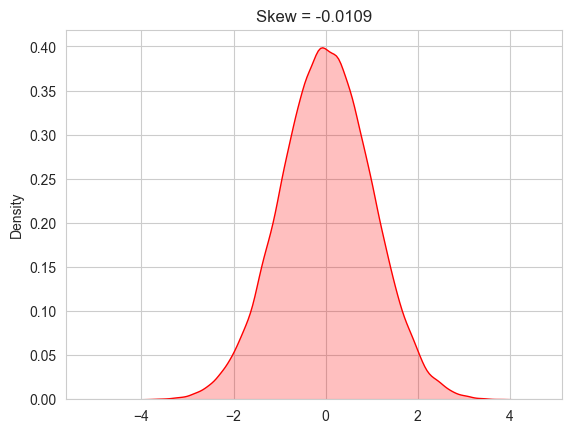

In [8]:
sns.kdeplot(n01, fill=True, color='red').set(title='Skew = '+s);

The skewness for a normal distribution is zero. A symmetric distribution has a skewness near zero.

In [9]:
spos = np.random.lognormal(0,1,1000)

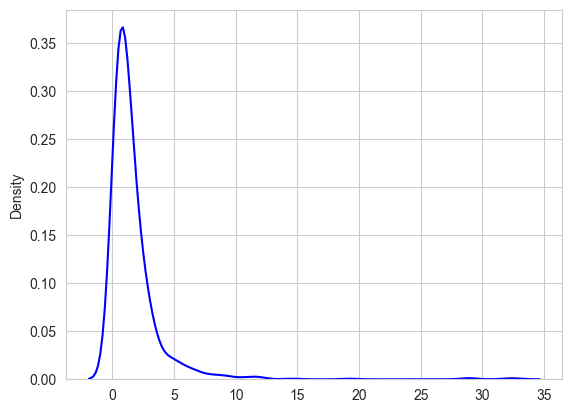

In [10]:
sns.kdeplot(spos, fill=False, color='blue');

In [11]:
s2 = str(round(skew(spos),4))
s2

'6.8846'

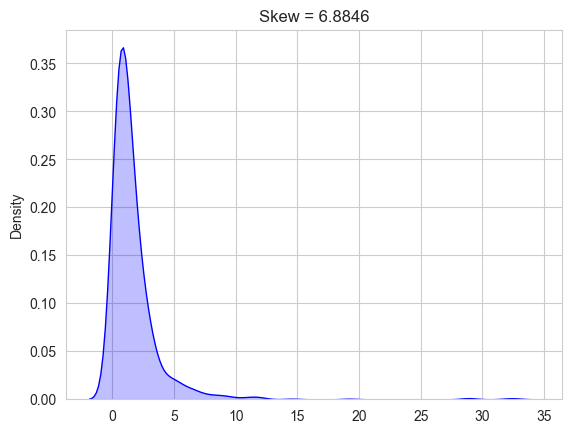

In [12]:
# Positive skewness
sns.kdeplot(spos, fill=True, color='blue').set(title='Skew = '+s2);

In [13]:
sneg = -np.random.lognormal(0,1,1000)

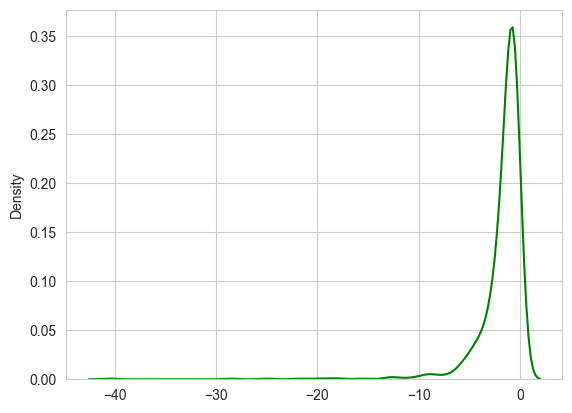

In [14]:
# Negative skewness
sns.kdeplot(sneg, fill=False, color='green');

In [15]:
s3 = str(round(skew(sneg),4))
s3

'-6.5362'

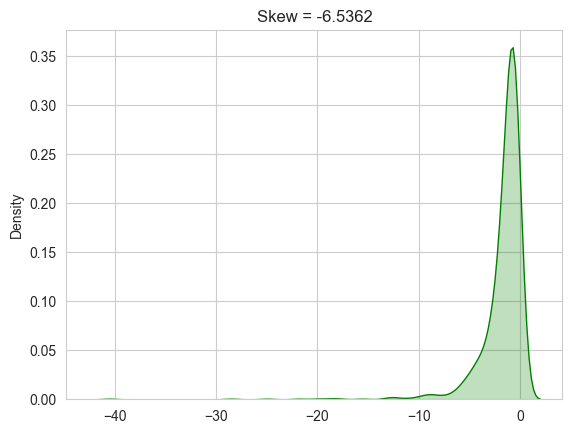

In [16]:
sns.kdeplot(sneg, fill=True, color='green').set(title='Skew = '+s3);

In [17]:
print('Skewness of G1 = %.4f' %(skew(data.G1)))
print('Skewness of G2 = %.4f' %(skew(data.G2)))
print('Skewness of G3 = %.4f' %(skew(data.G3)))

Skewness of G1 = 0.2397
Skewness of G2 = -0.4300
Skewness of G3 = -0.7299


## Kurtosis

**Kurtosis** is the sharpness of the peak of a frequency-distribution curve.

 - `Mesokurtic`: it is a distribution that has tails shaped in roughly the same way as any normal distribution

 - `Leptokurtic`: it is a distribution with kurtosis greater than a mesokurtic distribution. Leptokurtic distributions are named by the prefix "lepto" meaning "skinny."

 - `Platykurtic`: it is a distribution with kurtosis lesser than a mesokurtic distribution. The name of these distributions comes from the meaning of the prefix "platy" meaning "broad."

In [18]:
from scipy.stats import kurtosis

In [19]:
print('Mesokurtic Curve - Kurtosis = %.2f' %kurtosis(n01))

Mesokurtic Curve - Kurtosis = 0.01


In [20]:
n04  = np.random.normal(0,4,100000) 
n005 = np.random.normal(0,0.5,100000)

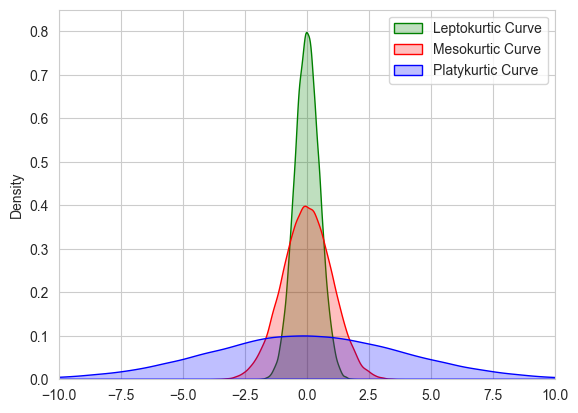

In [21]:
plt.ylim(0,0.85)
plt.xlim(-10,10)
sns.kdeplot(n005, fill=True, color='green', label='Leptokurtic Curve')
sns.kdeplot(n01,  fill=True, color='red',   label='Mesokurtic Curve')
sns.kdeplot(n04,  fill=True, color='blue',  label='Platykurtic Curve')
plt.legend();

In [22]:
print('Kurtosis of G1 = %.4f' %(kurtosis(data.G1)))
print('Kurtosis of G2 = %.4f' %(kurtosis(data.G2)))
print('Kurtosis of G3 = %.4f' %(kurtosis(data.G3)))

Kurtosis of G1 = -0.7002
Kurtosis of G2 = 0.6046
Kurtosis of G3 = 0.3832


Distributions with Skewness and Kurtosis values between -1 and 1 are reasonably close to normal. 

## Measures for type = object

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   sex        395 non-null    object
 2   age        395 non-null    int64 
 3   studytime  395 non-null    int64 
 4   schoolsup  395 non-null    object
 5   internet   395 non-null    object
 6   G1         395 non-null    int64 
 7   G2         395 non-null    int64 
 8   G3         395 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.9+ KB


In [24]:
data_o = data[['school','sex','schoolsup','internet']]
data_o.head()

,school,sex,schoolsup,internet
0,GP,F,yes,no
1,GP,F,no,yes
2,GP,F,yes,yes
3,GP,F,no,yes
4,GP,F,no,no


The following variables are 'object':
- school
- sex 
- schoolsup
- internet

Let's calculate the unique elements of those variables:

In [25]:
print('Values of "school":   ', data_o.school.unique())
print('Values of "sex":      ', data_o.sex.unique())
print('Values of "schoolsup":', data_o.schoolsup.unique())
print('Values of "internet": ', data_o.internet.unique())

Values of "school":    ['GP' 'MS']
Values of "sex":       ['F' 'M']
Values of "schoolsup": ['yes' 'no']
Values of "internet":  ['no' 'yes']


Let's find the mode:

In [26]:
print('Mode of "school":   ', data_o.school.mode()[0])
print('Mode of "sex":      ', data_o.sex.mode()[0])
print('Mode of "schoolsup":', data_o.schoolsup.mode()[0])
print('Mode of "internet": ', data_o.internet.mode()[0])

Mode of "school":    GP
Mode of "sex":       F
Mode of "schoolsup": no
Mode of "internet":  yes


Let's plot bar graphs to verify the results:

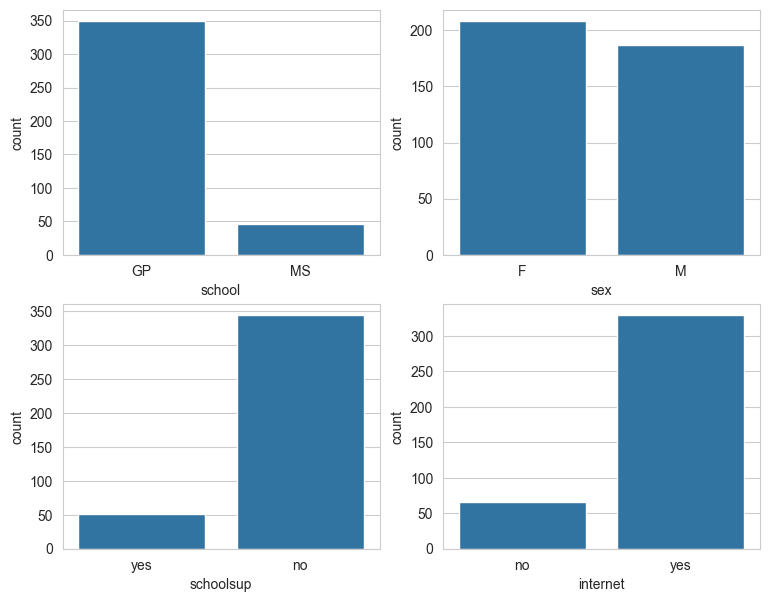

In [27]:
plt.figure(figsize=(9,7))
i=1
for c in data_o.columns:
    plt.subplot(2,2,i)
    sns.countplot(x=data_o[c]);
    #data_o[c].value_counts().plot(kind='bar');
    i += 1

**Pandas describe()** is used to view some basic statistical details like mean, std, quartiles, among other for numerical variables.

In [28]:
data.describe()

,age,studytime,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.04,10.91,10.71,10.42
std,1.28,0.84,3.32,3.76,4.58
min,15.00,1.00,3.00,0.00,0.00
25%,16.00,1.00,8.00,9.00,8.00
50%,17.00,2.00,11.00,11.00,11.00
75%,18.00,2.00,13.00,13.00,14.00
max,22.00,4.00,19.00,19.00,20.00


You can use **describe(include='all')** to include the 'object' variables.

In [29]:
data.describe(include='all')

,school,sex,age,studytime,schoolsup,internet,G1,G2,G3
count,395,395,395.00,395.00,395,395,395.00,395.00,395.00
unique,2,2,NaN,NaN,2,2,NaN,NaN,NaN
top,GP,F,NaN,NaN,no,yes,NaN,NaN,NaN
freq,349,208,NaN,NaN,344,329,NaN,NaN,NaN
mean,NaN,NaN,16.70,2.04,NaN,NaN,10.91,10.71,10.42
std,NaN,NaN,1.28,0.84,NaN,NaN,3.32,3.76,4.58
min,NaN,NaN,15.00,1.00,NaN,NaN,3.00,0.00,0.00
25%,NaN,NaN,16.00,1.00,NaN,NaN,8.00,9.00,8.00
50%,NaN,NaN,17.00,2.00,NaN,NaN,11.00,11.00,11.00
75%,NaN,NaN,18.00,2.00,NaN,NaN,13.00,13.00,14.00


Or you can use **include='object'** to display only measures of object variables.

In [30]:
data.describe(include='object')

,school,sex,schoolsup,internet
count,395,395,395,395
unique,2,2,2,2
top,GP,F,no,yes
freq,349,208,344,329


The four 'object' variables have 395 values; that is, they do not have missing data. All of them have two values. The 'top' option shows the mode value, and 'freq' shows its number of cases. You can use 'value_counts' to verify the results.

The school 'GP' has the most of the students, with 349.

In [31]:
data.school.value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [32]:
data.sex.value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [33]:
data.schoolsup.value_counts()

schoolsup
no     344
yes     51
Name: count, dtype: int64

In [34]:
data.internet.value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

## Conclusions

Key Takeaways:
- Students learn how to quantify and interpret the symmetry (skewness) and peakedness (kurtosis) of data distributions, which is crucial for assessing the nature of data spread and central tendency.
- Students use tools like Seaborn to plot distribution curves, enabling clear visualizations of skewness and kurtosis in the data.
- The notebook highlights the practical applications of these measures in understanding academic performance data, which can guide educational strategies and interventions.
- Students can make more informed statistical decisions based on the shape characteristics of the analyzed dataset.

## References

- Nussbaumer Knaflic, C. (2015) Storytelling with data. A data visualization guide for business professionals. USA: John Wiley & Sons. chapter 2
- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer